In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from subprocess import check_output
import warnings
warnings.filterwarnings("ignore")
#print(check_output(["ls", "input"]).decode("utf8"))


In [2]:
crimes1 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crimes2 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2013.csv')

In [3]:
crimes = pd.concat([crimes1,crimes2],  ignore_index=False, axis=0)

In [4]:
# rename the STATE/UT column to STATE
crimes.rename(columns={'STATE/UT':'STATE'}, inplace=True)

In [5]:
# delete data sets post concat
del crimes1
del crimes2

In [6]:
print('Dataset is ready....')
# know the shape of dataset
crimes.shape

Dataset is ready....


(9840, 10)

In [7]:
# collect the state names in a list and print
states = crimes.STATE.unique()
print(states)

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry']


In [8]:
# do some data cleansing on state names

for i in range(0, len(states)):
    states[i] = states[i].lower()
    
for j in range(0, len(states)):
    if states[j] == 'a & n islands':
       states[j] = 'a&n islands'
    
    if  states[j] == 'd & n haveli':
        states[j] = 'd&n haveli'
      
print(states)

['andhra pradesh' 'arunachal pradesh' 'assam' 'bihar' 'chhattisgarh' 'goa'
 'gujarat' 'haryana' 'himachal pradesh' 'jammu & kashmir' 'jharkhand'
 'karnataka' 'kerala' 'madhya pradesh' 'maharashtra' 'manipur' 'meghalaya'
 'mizoram' 'nagaland' 'odisha' 'punjab' 'rajasthan' 'sikkim' 'tamil nadu'
 'tripura' 'uttar pradesh' 'uttarakhand' 'west bengal' 'a&n islands'
 'chandigarh' 'd&n haveli' 'daman & diu' 'delhi' 'lakshadweep'
 'puducherry' 'andhra pradesh' 'arunachal pradesh' 'assam' 'bihar'
 'chhattisgarh' 'goa' 'gujarat' 'haryana' 'himachal pradesh'
 'jammu & kashmir' 'jharkhand' 'karnataka' 'kerala' 'madhya pradesh'
 'maharashtra' 'manipur' 'meghalaya' 'mizoram' 'nagaland' 'odisha'
 'punjab' 'rajasthan' 'sikkim' 'tamil nadu' 'tripura' 'uttar pradesh'
 'uttarakhand' 'west bengal' 'a&n islands' 'chandigarh' 'd&n haveli'
 'daman & diu' 'delhi ut' 'lakshadweep' 'puducherry']


In [9]:
# remove duplicate state names from the list
states = np.unique(states).tolist()

print(states)

['a&n islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'd&n haveli', 'daman & diu', 'delhi', 'delhi ut', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu & kashmir', 'jharkhand', 'karnataka', 'kerala', 'lakshadweep', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']


In [10]:
# convert the state names to lower
crimes['STATE'] = crimes['STATE'].str.lower()
crimes.head(3)

STATE   DISTRICT  Year  Rape  Kidnapping and Abduction  \
0  andhra pradesh   ADILABAD  2001    50                        30   
1  andhra pradesh  ANANTAPUR  2001    23                        30   
2  andhra pradesh   CHITTOOR  2001    27                        34   

   Dowry Deaths  Assault on women with intent to outrage her modesty  \
0            16                                                149     
1             7                                                118     
2            14                                                112     

   Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                          34                                  175   
1                          24                                  154   
2                          83                                  186   

   Importation of Girls  
0                     0  
1                     0  
2                     0

In [11]:
# filter out the Total crimes for each State & UT

crimes_total = crimes[crimes['DISTRICT'] == 'TOTAL']

In [12]:
# drop DISTRCT Column as we do not intend to use at this point
crimes_total.drop('DISTRICT', axis=1)
# filter out the Total crimes for each State & UT for the year 2001
crimes_total_2001 = crimes_total[crimes_total['Year'] == 2001]
crimes_total_2001.drop('Year', axis=1)

STATE DISTRICT  Rape  Kidnapping and Abduction  Dowry Deaths  \
28      andhra pradesh    TOTAL   871                       765           420   
42   arunachal pradesh    TOTAL    33                        55             0   
70               assam    TOTAL   817                      1070            59   
115              bihar    TOTAL   888                       518           859   
135       chhattisgarh    TOTAL   959                       171            70   
138                goa    TOTAL    12                         6             2   
169            gujarat    TOTAL   286                       857            67   
190            haryana    TOTAL   398                       297           285   
204   himachal pradesh    TOTAL   124                       105            10   
228    jammu & kashmir    TOTAL   169                       504            13   
253          jharkhand    TOTAL   567                       279           217   
285          karnataka    TOTAL   293                       271           220   
302             kerala    TOTAL   562                        97            27   
351     madhya pradesh    TOTAL  2851                       668           609   
397        maharashtra    TOTAL  1302                       611           308   
407            manipur    TOTAL    20                        62             0   
415          meghalaya    TOTAL    26                        11             0   
424            mizoram    TOTAL    52                         1             0   
435           nagaland    TOTAL    17                         6             0   
470             odisha    TOTAL   790                       434           294   
495             punjab    TOTAL   298                       324           159   
529          rajasthan    TOTAL  1049                      2165           376   
534             sikkim    TOTAL     8                         2             0   
573         tamil nadu    TOTAL   423                       607           191   
578            tripura    TOTAL   102                        35            16   
650      uttar pradesh    TOTAL  1958                      2879          2211   
664        uttarakhand    TOTAL    74                       126            56   
688        west bengal    TOTAL   709                       695           265   
691      a & n islands    TOTAL     3                         2             0   
693         chandigarh    TOTAL    18                        50             3   
695       d & n haveli    TOTAL     6                         2             0   
698        daman & diu    TOTAL     0                         3             0   
713        lakshadweep    TOTAL     0                         0             0   
715         puducherry    TOTAL     9                         3             1   

     Assault on women with intent to outrage her modesty  \
28                                                3544     
42                                                  78     
70                                                 850     
115                                                562     
135                                               1763     
138                                                 17     
169                                                756     
190                                                478     
204                                                310     
228                                                622     
253                                                297     
285                                               1665     
302                                               1942     
351                                               7063     
397                                               2823     
407                                                 21     
415                                                 25     
424                                                 52     
435                                      

In [13]:
# Data of Rape crime committed in the year 2001 per state
x = crimes_total_2001['STATE'].values
y = crimes_total_2001['Rape'].values

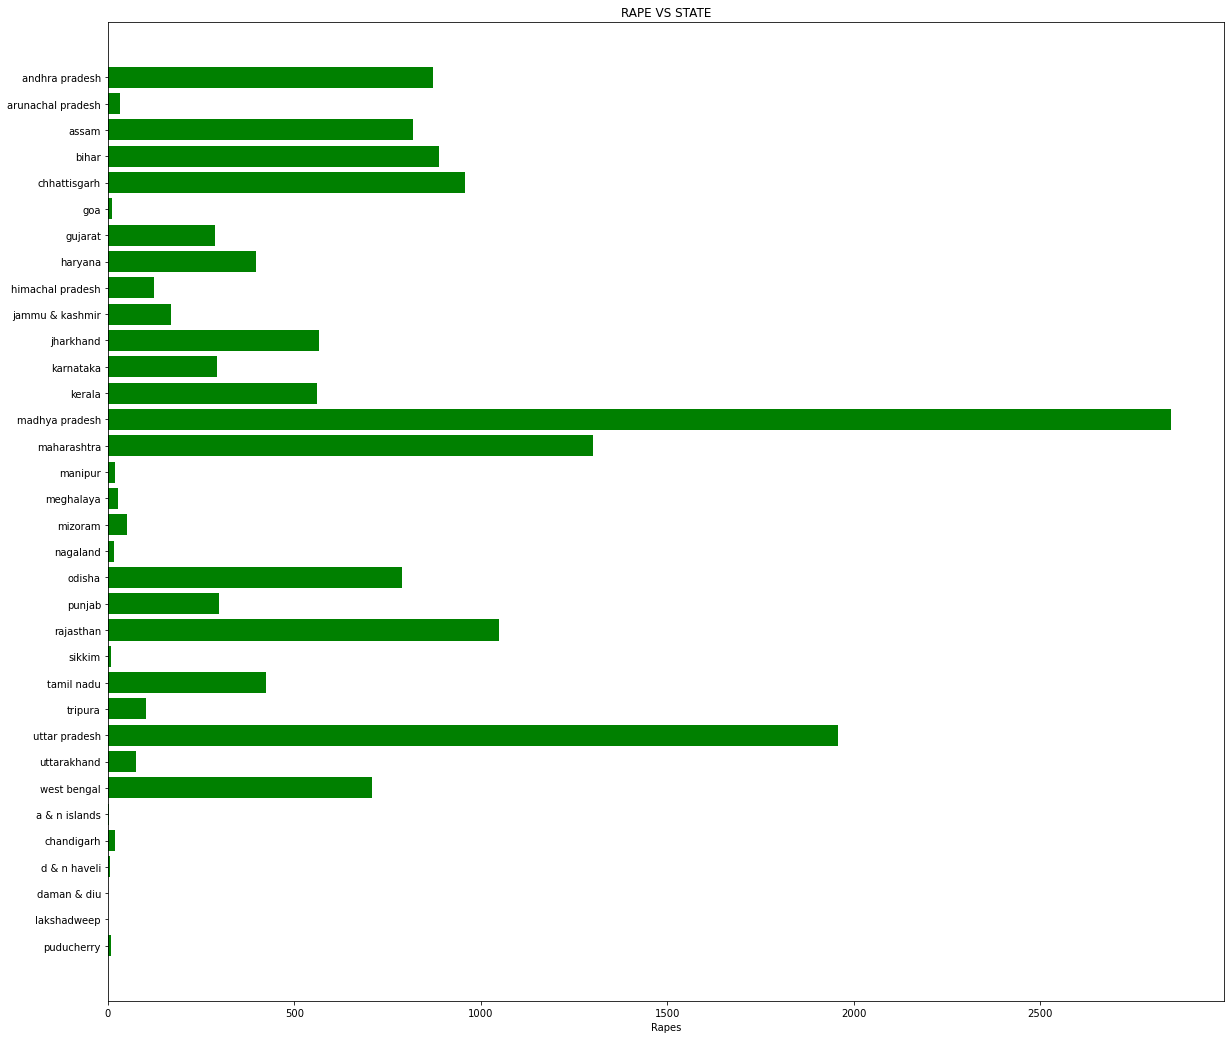

In [14]:
# plot the bar graph
fig, ax = plt.subplots()
crime_rape = crimes_total_2001['STATE'].values
y_pos = np.arange(len(crime_rape))
performance = crimes_total_2001['Rape'].values
ax.barh(y_pos, performance, align='center',color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(crime_rape)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Rapes')
ax.set_title('RAPE VS STATE')
fig.set_size_inches(20, 18, forward=True)
plt.show()

In [28]:
# Any results you write to the current directory are saved as output.
# creating a new data set

crimes_total_women1 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')
crimes_total_women2 = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2013.csv')

In [29]:
crimes_total_women = pd.concat([crimes_total_women1,crimes_total_women2],  ignore_index=False, axis=0)
crimes_total_women.rename(columns={'STATE/UT':'STATE'}, inplace=True)

del crimes_total_women1
del crimes_total_women2

In [30]:
# calculating total crimes of all kinds in each state from 2001 to 2013
crimes_total_women = crimes_total_women[crimes_total_women['DISTRICT'] == 'TOTAL']
crimes_total_women = crimes_total_women.drop('DISTRICT', axis=1)
crimes_total_women['Total Crimes']= crimes_total_women.iloc[:, -9:-1].sum(axis=1)
crimes_total_women
# crimes_total_women = crimes_total_women.groupby(['STATE'])['Total Crimes'].sum()

STATE  Year  Rape  Kidnapping and Abduction  Dowry Deaths  \
28       ANDHRA PRADESH  2001   871                       765           420   
42    ARUNACHAL PRADESH  2001    33                        55             0   
70                ASSAM  2001   817                      1070            59   
115               BIHAR  2001   888                       518           859   
135        CHHATTISGARH  2001   959                       171            70   
...                 ...   ...   ...                       ...           ...   
8988         CHANDIGARH  2012    27                        66             5   
8990       D & N HAVELI  2012     3                         9             0   
8993        DAMAN & DIU  2012     5                         0             0   
9013        LAKSHADWEEP  2012     0                         0             0   
9016         PUDUCHERRY  2012    13                        16             0   

      Assault on women with intent to outrage her modesty  \
28                                                 3544     
42                                                   78     
70                                                  850     
115                                                 562     
135                                                1763     
...                                                 ...     
8988                                                 45     
8990                                                  2     
8993                                                  0     
9013                                                  1     
9016                                                  9     

      Insult to modesty of Women  Cruelty by Husband or his Relatives  \
28                          2271                                 5791   
42                             3                                   11   
70                             4                                 1248   
115                           21                                 1558   
135                          161                                  840   
...                          ...                                  ...   
8988                          25                                   73   
8990                           0                                    0   
8993                           0                                    3   
9013                           0                                    1   
9016                           2                                    6   

      Importation of Girls  Total Crimes  
28                       7         15663  
42                       0          2181  
70                       0          6049  
115                     83          6407  
135                      0          5965  
...                    ...           ...  
8988                     0          2253  
8990                     0          2026  
8993                     0          2020  
9013                     0          2014  
9016                     0          2058  

[408 rows x 10 columns]

In [31]:
# print(crimes_total_women.iloc[1,2])
type(crimes_total_women)

pandas.core.frame.DataFrame

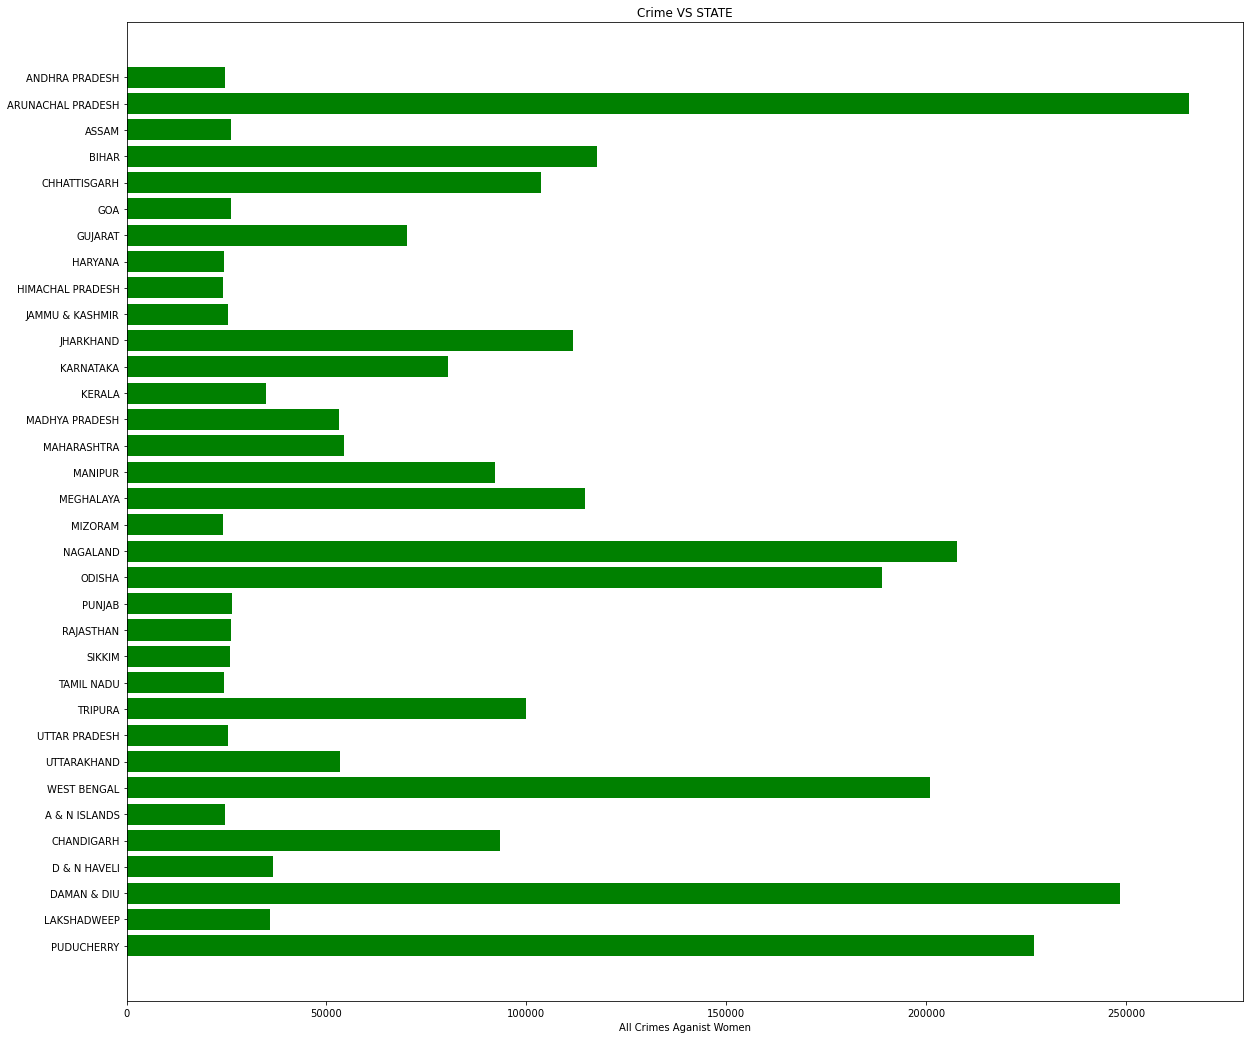

In [32]:
# plot graph of crimes committed on women since 2001-2013 in each state/ UT
fig1, ax1 = plt.subplots()
states = crimes_total_women['STATE'].unique()
y_pos = np.arange(len(states))
performance = crimes_total_women.groupby('STATE')['Total Crimes'].sum()
ax1.barh(y_pos, performance, align='center',color='green', ecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(states)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_xlabel('All Crimes Aganist Women')
ax1.set_title('Crime VS STATE')
fig1.set_size_inches(20, 18, forward=True)
plt.show()

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
rape_data = pd.read_csv('input/20_Victims_of_rape.csv')
state_geo = pd.read_csv('input/poptable.csv')
#rape_data.rename(columns={'Area_Name': 'State'}, inplace=True)
rape_data.head()

Area_Name  Year                Subgroup  \
0  Andaman & Nicobar Islands  2001      Total Rape Victims   
1  Andaman & Nicobar Islands  2001  Victims of Incest Rape   
2  Andaman & Nicobar Islands  2001   Victims of Other Rape   
3  Andaman & Nicobar Islands  2002      Total Rape Victims   
4  Andaman & Nicobar Islands  2002  Victims of Incest Rape   

   Rape_Cases_Reported  Victims_Above_50_Yrs  Victims_Between_10-14_Yrs  \
0                    3                     0                          0   
1                    1                     0                          0   
2                    2                     0                          0   
3                    2                     0                          0   
4                    0                     0                          0   

   Victims_Between_14-18_Yrs  Victims_Between_18-30_Yrs  \
0                          3                          0   
1                          1                          0   
2                          2                          0   
3                          1                          1   
4                          0                          0   

   Victims_Between_30-50_Yrs  Victims_of_Rape_Total  Victims_Upto_10_Yrs  
0                          0                      3                    0  
1                          0                      1                    0  
2                          0                      2                    0  
3                          0                      2                    0  
4                          0                      0                    0

In [35]:
state_geo.head()

Unnamed: 0               State.Name   latitude  longitude
0           1  ANDAMAN AND NICOBAR      11.667026  92.735983
1           2      ANDHRA PRADESH       14.750429  78.570026
2           3    ARUNACHAL PRADESH      27.100399  93.616601
3           4                ASSAM      26.749981  94.216667
4           5                BIHAR      25.785414  87.479973

In [36]:
rape_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Area_Name                  1050 non-null   object
 1   Year                       1050 non-null   int64 
 2   Subgroup                   1050 non-null   object
 3   Rape_Cases_Reported        1050 non-null   int64 
 4   Victims_Above_50_Yrs       1050 non-null   int64 
 5   Victims_Between_10-14_Yrs  1050 non-null   int64 
 6   Victims_Between_14-18_Yrs  1050 non-null   int64 
 7   Victims_Between_18-30_Yrs  1050 non-null   int64 
 8   Victims_Between_30-50_Yrs  1050 non-null   int64 
 9   Victims_of_Rape_Total      1050 non-null   int64 
 10  Victims_Upto_10_Yrs        1050 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 90.4+ KB


In [37]:
'''def set_value(row_number, assigned_value): 
    return assigned_value[row_number]'''

latitude_mapping = {"Andaman & Nicobar Islands": 11.7400867, "Andhra Pradesh":15.91, "Arunachal Pradesh":28.21, "Assam":26.20, "Bihar":25.09
                , "Chandigarh":30.7333, "Chhattisgarh":21.27, "Dadra & Nagar Haveli":20.1809, "Daman & Diu":20.4283, "Delhi":28.7041, "Goa":15.29, "Gujarat":22.25
                , "Haryana":29.05, "Himachal Pradesh":31.10, "Jammu & Kashmir":33.77, "Jharkhand":23.61, "Karnataka":15.31, "Kerala":10.85,
                "Lakshadweep":10,"Madhya Pradesh":22.97,"Maharashtra":19.75,"Manipur":24.66,"Meghalaya":25.46,"Mizoram":23.16,"Nagaland":26.15,"Odisha":20.95,"Puducherry":11.9416,
                "Punjab":31.14,"Rajasthan":27.02,"Sikkim":27.53,"Tamil Nadu":11.12,"Tripura":23.94,"Uttar Pradesh":26.84,"Uttarakhand":30.06,"West Bengal":22.98}

#event_dictionary ={'Music' : 1500, 'Poetry' : 800, 'Comedy' : 1200} 
    
# Add a new column named 'Price' 
#df['Price'] = df['Event'].apply(set_value, args =(event_dictionary, )) 
#rape_data['Latitude'] = rape_data['Area_Name'].apply(set_value, args=(latitude_mapping))


rape_data['Latitude'] = rape_data['Area_Name'].map(latitude_mapping)
  

#print(rape_data) 

'''for dataset in rape_data.iteritems():
    #print(dataset)
    dataset['Latitude'] = dataset['Latitude'].map(latitude_mapping)
    #dataset[1] = dataset[1].map(latitude_mapping)
    #print(dataset)
    dataset['Latitude'] = dataset['Latitude'].fillna(0)'''
    
rape_data.head()

Area_Name  Year                Subgroup  \
0  Andaman & Nicobar Islands  2001      Total Rape Victims   
1  Andaman & Nicobar Islands  2001  Victims of Incest Rape   
2  Andaman & Nicobar Islands  2001   Victims of Other Rape   
3  Andaman & Nicobar Islands  2002      Total Rape Victims   
4  Andaman & Nicobar Islands  2002  Victims of Incest Rape   

   Rape_Cases_Reported  Victims_Above_50_Yrs  Victims_Between_10-14_Yrs  \
0                    3                     0                          0   
1                    1                     0                          0   
2                    2                     0                          0   
3                    2                     0                          0   
4                    0                     0                          0   

   Victims_Between_14-18_Yrs  Victims_Between_18-30_Yrs  \
0                          3                          0   
1                          1                          0   
2                          2                          0   
3                          1                          1   
4                          0                          0   

   Victims_Between_30-50_Yrs  Victims_of_Rape_Total  Victims_Upto_10_Yrs  \
0                          0                      3                    0   
1                          0                      1                    0   
2                          0                      2                    0   
3                          0                      2                    0   
4                          0                      0                    0   

    Latitude  
0  11.740087  
1  11.740087  
2  11.740087  
3  11.740087  
4  11.740087

In [38]:
rape_data.isnull().sum()

Area_Name                    0
Year                         0
Subgroup                     0
Rape_Cases_Reported          0
Victims_Above_50_Yrs         0
Victims_Between_10-14_Yrs    0
Victims_Between_14-18_Yrs    0
Victims_Between_18-30_Yrs    0
Victims_Between_30-50_Yrs    0
Victims_of_Rape_Total        0
Victims_Upto_10_Yrs          0
Latitude                     0
dtype: int64

In [39]:
longitude_mapping = {"Andaman & Nicobar Islands": 92.6586, "Andhra Pradesh":79.74, "Arunachal Pradesh":94.72, "Assam":92.93, "Bihar":85.31
                , "Chandigarh":76.7794, "Chhattisgarh":81.86, "Dadra & Nagar Haveli":73.0169, "Daman & Diu":72.8397, "Delhi":77.1025, "Goa":74.12, "Gujarat":71.19
                , "Haryana":76.08, "Himachal Pradesh":77.17, "Jammu & Kashmir":76.57, "Jharkhand":85.27, "Karnataka":75.71, "Kerala":76.27,
                "Lakshadweep":72.1833,"Madhya Pradesh":78.65,"Maharashtra":75.71,"Manipur":93.90,"Meghalaya":91.36,"Mizoram":92.93,"Nagaland":94.56,"Odisha":85.09,"Puducherry":79.8083,
                "Punjab":75.34,"Rajasthan":74.21,"Sikkim":88.51,"Tamil Nadu":78.65,"Tripura":91.98,"Uttar Pradesh":80.94,"Uttarakhand":79.01,"West Bengal":87.85}

rape_data['Longitude'] = rape_data['Area_Name'].map(longitude_mapping)

In [40]:
rape_data.head()

Area_Name  Year                Subgroup  \
0  Andaman & Nicobar Islands  2001      Total Rape Victims   
1  Andaman & Nicobar Islands  2001  Victims of Incest Rape   
2  Andaman & Nicobar Islands  2001   Victims of Other Rape   
3  Andaman & Nicobar Islands  2002      Total Rape Victims   
4  Andaman & Nicobar Islands  2002  Victims of Incest Rape   

   Rape_Cases_Reported  Victims_Above_50_Yrs  Victims_Between_10-14_Yrs  \
0                    3                     0                          0   
1                    1                     0                          0   
2                    2                     0                          0   
3                    2                     0                          0   
4                    0                     0                          0   

   Victims_Between_14-18_Yrs  Victims_Between_18-30_Yrs  \
0                          3                          0   
1                          1                          0   
2                          2                          0   
3                          1                          1   
4                          0                          0   

   Victims_Between_30-50_Yrs  Victims_of_Rape_Total  Victims_Upto_10_Yrs  \
0                          0                      3                    0   
1                          0                      1                    0   
2                          0                      2                    0   
3                          0                      2                    0   
4                          0                      0                    0   

    Latitude  Longitude  
0  11.740087    92.6586  
1  11.740087    92.6586  
2  11.740087    92.6586  
3  11.740087    92.6586  
4  11.740087    92.6586

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

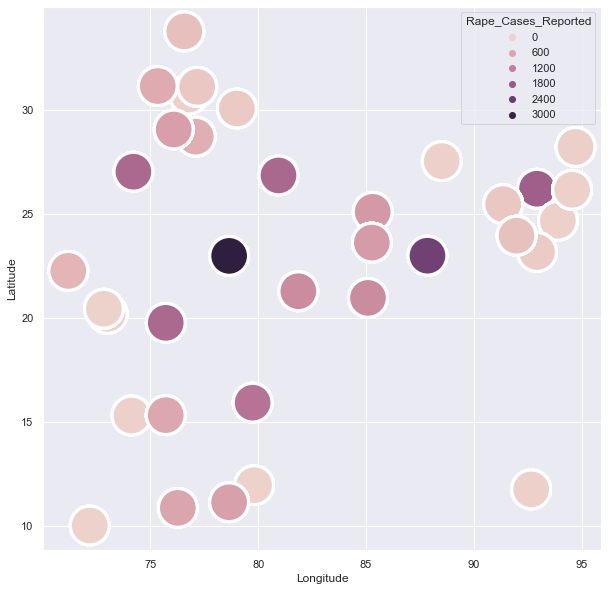

In [41]:
sns.set(rc={'figure.figsize':(10,10)})
sns.scatterplot(x='Longitude', y='Latitude', hue='Rape_Cases_Reported',s=1500, data=rape_data)

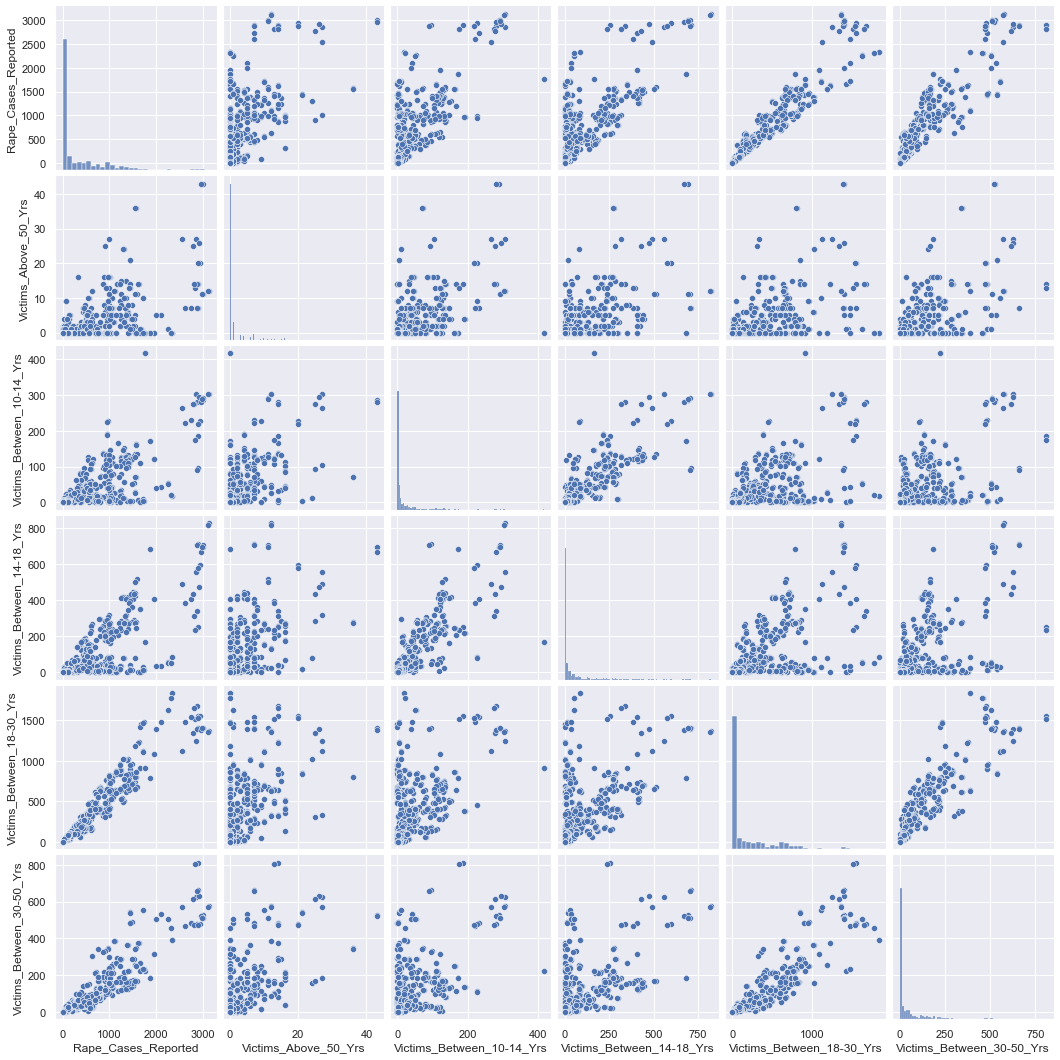

In [42]:
sns.pairplot(rape_data, vars=["Rape_Cases_Reported", "Victims_Above_50_Yrs","Victims_Between_10-14_Yrs", "Victims_Between_14-18_Yrs","Victims_Between_18-30_Yrs","Victims_Between_30-50_Yrs"])

<AxesSubplot:xlabel='Rape_Cases_Reported', ylabel='Area_Name'>

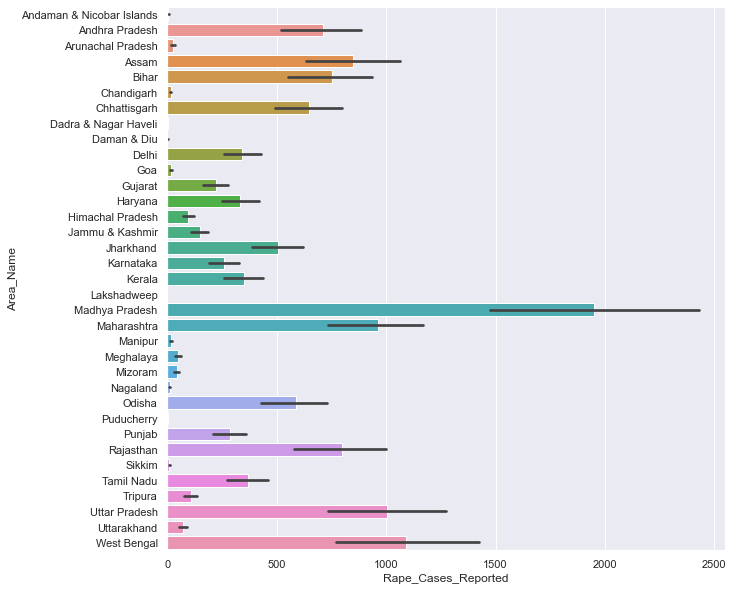

In [43]:
sns.barplot(x="Rape_Cases_Reported", y="Area_Name", data=rape_data)

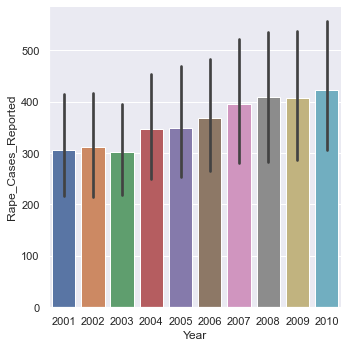

In [44]:
sns.factorplot(x="Year", y="Rape_Cases_Reported", data=rape_data, kind='bar')

In [45]:
dw_crime_against_women = pd.read_csv('input/crime/42_District_wise_crimes_committed_against_women_2013.csv')
dw_crime_against_women

STATE/UT     DISTRICT  Year  Rape  Kidnapping and Abduction  \
0    Andhra Pradesh     ADILABAD  2013    61                        47   
1    Andhra Pradesh    ANANTAPUR  2013    28                        84   
2    Andhra Pradesh     CHITTOOR  2013    31                        27   
3    Andhra Pradesh     CUDDAPAH  2013    19                        50   
4    Andhra Pradesh    CYBERABAD  2013   138                       129   
..              ...          ...   ...   ...                       ...   
818     Lakshadweep  LAKSHADWEEP  2013     2                         0   
819     Lakshadweep     ZZ TOTAL  2013     2                         0   
820      Puducherry     KARAIKAL  2013     6                         2   
821      Puducherry   PUDUCHERRY  2013    11                        23   
822      Puducherry     ZZ TOTAL  2013    17                        25   

     Dowry Deaths  Assault on women with intent to outrage her modesty  \
0              12                                                197     
1              23                                                337     
2              13                                                119     
3               9                                                318     
4              43                                                350     
..            ...                                                ...     
818             0                                                  1     
819             0                                                  1     
820             1                                                  1     
821             0                                                 11     
822             1                                                 12     

     Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                           138                                  464   
1                            43                                  161   
2                            84                                  435   
3                           163                                  207   
4                           338                                 1526   
..                          ...                                  ...   
818                           0                                    0   
819                           0                                    0   
820                           1                                    1   
821                           7                                    7   
822                           8                                    8   

     Importation of Girls  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
..                    ...  
818                     0  
819                     0  
820                     0  
821                     0  
822                     0  

[823 rows x 10 columns]

In [46]:
dw_crime_against_women.DISTRICT.unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'CYBERABAD',
       'EAST GODAVARI', 'GUNTAKAL RLY.', 'GUNTUR', 'GUNTUR URBAN',
       'HYDERABAD CITY', 'KARIMNAGAR', 'KHAMMAM', 'KRISHNA', 'KURNOOL',
       'MAHABOOBNAGAR', 'MEDAK', 'NALGONDA', 'NELLORE', 'NIZAMABAD',
       'PRAKASHAM', 'RAJAHMUNDRY', 'RANGA REDDY', 'SECUNDERABAD RLY.',
       'SRIKAKULAM', 'TIRUPATHI URBAN', 'VIJAYAWADA CITY',
       'VIJAYAWADA RLY.', 'VISAKHA RURAL', 'VISAKHAPATNAM',
       'VIZIANAGARAM', 'WARANGAL', 'WARANGAL URBAN', 'WEST GODAVARI',
       'ZZ TOTAL', 'ANJAW', 'CHANGLANG', 'DIBANG VALLEY', 'K/KUMEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'LONGDING', 'PAPUM PARE',
       'RURAL', 'SIANG EAST', 'SIANG UPPER', 'SIANG WEST',
       'SUBANSIRI LOWER', 'SUBANSIRI UPPER', 'TAWANG', 'TIRAP',
       'UPPER DIBANG VALLEY', 'BAKSA', 'BARPETA', 'BIEO', 'BONGAIGAON',
       'C.I.D.', 'CACHAR', 'CHIRANG', 'DARRANG', 'DHEMAJI', 'DHUBRI',
       'DIBRUGARH', 'G.R.P.', 'GOALPARA', 'GOLAGHAT', 'GU

In [47]:
#dw_crime_against_women.to_csv(r'../File_Name.csv')
dw_crime_against_women.to_csv('mycsvfile.csv',index=False)

In [48]:
data = pd.read_csv('mycsvfile.csv')

In [49]:
data

STATE/UT     DISTRICT  Year  Rape  Kidnapping and Abduction  \
0    Andhra Pradesh     ADILABAD  2013    61                        47   
1    Andhra Pradesh    ANANTAPUR  2013    28                        84   
2    Andhra Pradesh     CHITTOOR  2013    31                        27   
3    Andhra Pradesh     CUDDAPAH  2013    19                        50   
4    Andhra Pradesh    CYBERABAD  2013   138                       129   
..              ...          ...   ...   ...                       ...   
818     Lakshadweep  LAKSHADWEEP  2013     2                         0   
819     Lakshadweep     ZZ TOTAL  2013     2                         0   
820      Puducherry     KARAIKAL  2013     6                         2   
821      Puducherry   PUDUCHERRY  2013    11                        23   
822      Puducherry     ZZ TOTAL  2013    17                        25   

     Dowry Deaths  Assault on women with intent to outrage her modesty  \
0              12                                                197     
1              23                                                337     
2              13                                                119     
3               9                                                318     
4              43                                                350     
..            ...                                                ...     
818             0                                                  1     
819             0                                                  1     
820             1                                                  1     
821             0                                                 11     
822             1                                                 12     

     Insult to modesty of Women  Cruelty by Husband or his Relatives  \
0                           138                                  464   
1                            43                                  161   
2                            84                                  435   
3                           163                                  207   
4                           338                                 1526   
..                          ...                                  ...   
818                           0                                    0   
819                           0                                    0   
820                           1                                    1   
821                           7                                    7   
822                           8                                    8   

     Importation of Girls  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
..                    ...  
818                     0  
819                     0  
820                     0  
821                     0  
822                     0  

[823 rows x 10 columns]

# Decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('input/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)

In [51]:
pos=df[(df['highCrime'] == 1)]
pos_percentage=len(pos)/len(df)
neg_percentage=1-pos_percentage
print('positive instance percentage is ',pos_percentage)
print('negative instance percentage is ',neg_percentage)

positive instance percentage is  0.6271951831409934
negative instance percentage is  0.37280481685900657


In [52]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
initial=pd.read_csv('input/communities-crime-clean.csv')
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)
initial = initial.drop('fold', 1)

initial = initial.drop('state', 1)
Y = df['highCrime']
clf = tree.DecisionTreeClassifier(max_depth=3)
# clf = tree.DecisionTreeClassifier()
clf = clf.fit(initial, Y)
clf
y_pred = clf.predict(initial)
list(initial)
feature_name=list(initial)


In [53]:
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(clf, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(clf, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

cross_val_accuracy is  [0.79       0.875      0.83       0.84924623 0.65326633 0.75879397
 0.84924623 0.7839196  0.79396985 0.79899497]
cross_val_accuracy_avg is  0.7982437185929648
cross_val_precision is  [0.78231293 0.85211268 0.84210526 0.88       0.75454545 0.88118812
 0.85185185 0.94565217 0.79166667 0.85123967]
cross_val_precision_avg is  0.8432674799594686
cross_val_recall is  [0.92  0.968 0.896 0.88  0.664 0.712 0.92  0.696 0.912 0.824]
cross_val_recall_avg is  0.8392


In [54]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 83.59257400903161
Precesion is 90.02601908065915
Recall is 83.04


In [55]:
DT_acc = accuracy_score(Y,y_pred)*100
#print(DT_acc)

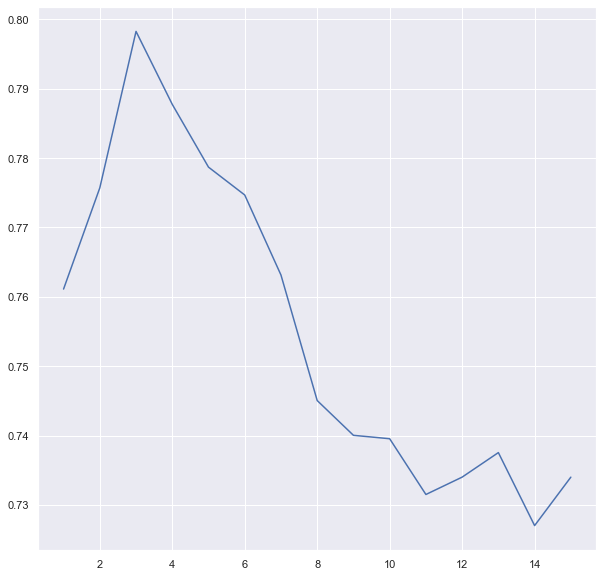

 [0.7611130653266331, 0.7756934673366834, 0.7982437185929648, 0.7877311557788944, 0.7786834170854272, 0.7746683417085427, 0.7631356783919598, 0.7450452261306533, 0.7400351758793969, 0.7395427135678392, 0.7315075376884422, 0.7340100502512563, 0.7375452261306533, 0.7270251256281407, 0.7340050251256282]


In [56]:
y=[]
x=[]
for i in range (1,16):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(initial, Y)
    y_pred = clf.predict(initial)
    scores = cross_val_score(clf, initial, Y,None,'accuracy',cv=10)
    y.append(np.array(scores).mean())
    x.append(i)

    
plt.plot(x, y)

plt.show()

print('',y)

In [57]:
feature_selection = clf.feature_importances_ 
   

ind = np.argpartition(feature_selection, -4)[-4:]

print('ind is ',ind)
print('4_max_normalized_feature is ',feature_selection[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])

ind is  [34  5 44  3]
4_max_normalized_feature is  [0.02322    0.04512009 0.36356045 0.08881686]
34
feature_name[index] is  PctEmplManu
5
feature_name[index] is  racePctHisp
44
feature_name[index] is  PctKids2Par
3
feature_name[index] is  racePctWhite


# NaiveBayes-Gaussian

In [58]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(initial, Y).predict(initial)

print("mislabel num is ",(Y != y_pred).sum())

# print ('sigma is ',gnb.sigma_)
variance=gnb.sigma_
stand_deviation =np.sqrt( variance)
# print('standard deviation is',stand_deviation);
sum_standard=stand_deviation[0]+stand_deviation[1]
# print('sum of standard deviation is',sum_standard);

# print ('theta is ',gnb.theta_)
mean=gnb.theta_
difference=mean[0]-mean[1]
# print('difference is ',abs(difference))
normalized_feature=abs(difference)/sum_standard
# print('normalized_feature is ',normalized_feature)

mislabel num is  442


In [59]:
ind = np.argpartition(normalized_feature, -10)[-10:]

print('ind is ',ind)
print('10_max_normalized_feature is ',normalized_feature[ind])

for x in range(0, len(ind)):
    index=ind[x]
    print(index)
    print('feature_name[index] is ',feature_name[index])


ind is  [38 44 45 41 15 46 50  3 43 40]
10_max_normalized_feature is  [0.61686366 0.80974842 0.66500857 0.67464461 0.66107643 0.64294945
 0.70926105 0.73522995 0.74554481 0.69397809]
38
feature_name[index] is  MalePctDivorce
44
feature_name[index] is  PctKids2Par
45
feature_name[index] is  PctYoungKids2Par
41
feature_name[index] is  TotalPctDiv
15
feature_name[index] is  pctWInvInc
46
feature_name[index] is  PctTeen2Par
50
feature_name[index] is  PctIlleg
3
feature_name[index] is  racePctWhite
43
feature_name[index] is  PctFam2Par
40
feature_name[index] is  FemalePctDiv


In [60]:
from sklearn.model_selection import cross_val_score
fold=df['fold']
scores = cross_val_score(gnb, initial, Y,fold,'accuracy',10)
print('cross_val_accuracy is ',scores) 
print('cross_val_accuracy_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'precision',10)
print('cross_val_precision is ',scores) 
print('cross_val_precision_avg is ',np.array(scores).mean()) 
scores = cross_val_score(gnb, initial, Y,fold,'recall',10)
print('cross_val_recall is ',scores) 
print('cross_val_recall_avg is ',np.array(scores).mean()) 

cross_val_accuracy is  [0.775      0.8        0.825      0.79899497 0.70351759 0.65326633
 0.81407035 0.73366834 0.71356784 0.79899497]
cross_val_accuracy_avg is  0.761608040201005
cross_val_precision is  [0.86363636 0.92929293 0.95       0.92079208 0.94594595 0.86842105
 0.92307692 1.         0.77868852 0.93814433]
cross_val_precision_avg is  0.9117998148278733
cross_val_recall is  [0.76  0.736 0.76  0.744 0.56  0.528 0.768 0.576 0.76  0.728]
cross_val_recall_avg is  0.692


In [61]:
from sklearn.metrics import accuracy_score
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
from sklearn.metrics import precision_score
print ('Precesion is', precision_score(Y,y_pred)*100)
from sklearn.metrics import recall_score
print ('Recall is', recall_score(Y,y_pred)*100)

Accuracy is 77.82237832413446
Precesion is 93.16239316239316
Recall is 69.76


In [62]:
GNB_acc = accuracy_score(Y,y_pred)*100

# K-NN

In [63]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

df=pd.read_csv('input/communities-crime-clean.csv')
df['highCrime'] = np.where(df['ViolentCrimesPerPop']>0.1, 1, 0)
initial=pd.read_csv('input/communities-crime-clean.csv')
Y = df['highCrime']
fold=df['fold']
state=df['state']
community=df['communityname']
initial = initial.drop('fold', 1)
initial = initial.drop('state', 1)
initial = initial.drop('communityname', 1)
initial = initial.drop('ViolentCrimesPerPop', 1)

In [64]:
x=[]
y=[]
for k in range (1,16):
    y.append([])
for i in range (2,15):
    pca = PCA(n_components=i)
    pca.fit(initial)
    pcdf = pca.transform(initial)
    for j in range (1,16):
        knn = KNeighborsClassifier(j)
        knn.fit(pcdf,Y)
        scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
        y[j-1].append(np.mean(scores))
    x.append(i)

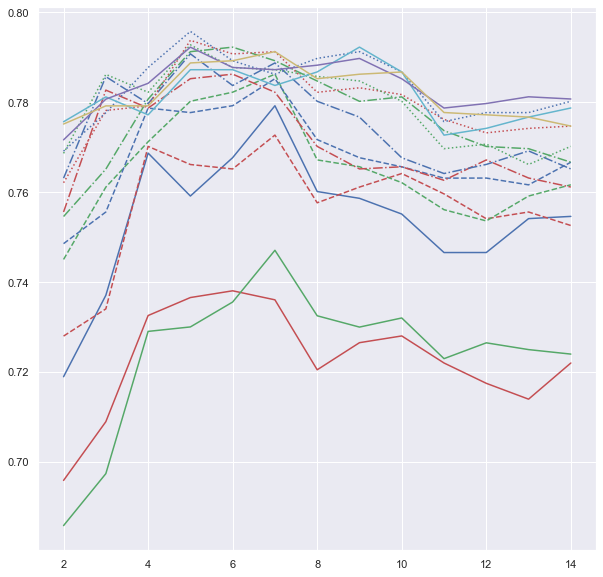

In [65]:
plt.plot(x,y[0],'r-',
         x,y[1],'g-',
         x,y[2],'b-',
         x,y[3],'r--',
         x,y[4],'g--',
         x,y[5],'b--',
         x,y[6],'r-.',
         x,y[7],'g-.',
         x,y[8],'b-.',
         x,y[9],'r:',
         x,y[10],'g:',
         x,y[11],'b:',
         x,y[12],'c-',
         x,y[13],'m-',
         x,y[14],'y-')
plt.show()

In [66]:
pca = PCA(n_components=5)
pca.fit(initial)
pca.components_
pca.explained_variance_ratio_
pcdf = pca.transform(initial)
pcdf

array([[ 0.42940989, -0.53929962,  0.31031454,  0.614929  , -0.78039948],
       [-1.19933196, -0.90092286,  0.31801595,  0.06578608,  0.0851906 ],
       [-1.25540273, -0.45223119, -0.37326947, -0.57765157, -0.34191677],
       ...,
       [-0.39828125, -0.04847062, -0.72054899,  1.84903699,  0.50341982],
       [-0.06739216, -0.87415147,  0.57794266,  0.14245354, -0.03894173],
       [-0.53794345, -0.94270676, -0.04992509,  0.22885671,  0.51675916]])

In [67]:
from sklearn.metrics import f1_score
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(pcdf,Y)
y_pred = knn.predict(pcdf)
print ('fl score is', f1_score(Y,y_pred,average="binary")*100)
print ('Accuracy is', accuracy_score(Y,y_pred)*100)
print ('Precision is', precision_score(Y,y_pred)*100)
print ('Recall is', recall_score(Y,y_pred)*100)

fl score is 87.0279146141215
Accuracy is 84.14450577019569
Precision is 89.3760539629005
Recall is 84.8


In [68]:
KNN_acc = accuracy_score(Y,y_pred)*100

In [69]:
scores = cross_val_score(knn,pcdf,Y,fold,'accuracy',10)
print ('Cross validation accuracy is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'precision',10)
print ('Cross validation precision is', np.mean(scores)*100)
scores = cross_val_score(knn,pcdf,Y,fold,'recall',10)
print ('Cross validation recall is', np.mean(scores)*100)

Cross validation accuracy is 79.57286432160804
Cross validation precision is 85.35884460774638
Cross validation recall is 81.60000000000001


# Boosted Decesion Tree

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [71]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator= model,n_estimators=400,learning_rate=1)

In [72]:
AdaBoost.fit(initial, Y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1),
                   learning_rate=1, n_estimators=400)

In [73]:
prediction = AdaBoost.score(initial, Y)

In [74]:
print('The accuracy is: ',prediction*100,'%')

The accuracy is:  97.99297541394883 %


In [75]:
BoostedDT = prediction*100

# Comparsion

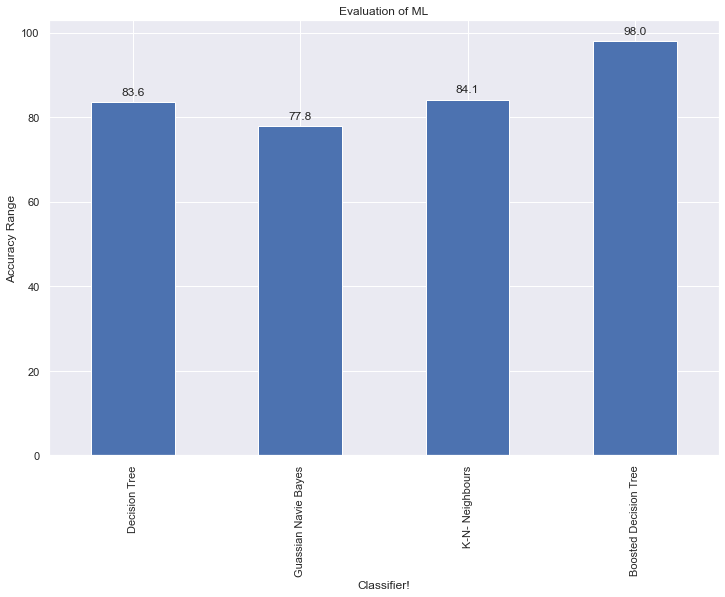

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bring some raw data.
frequencies = [DT_acc,GNB_acc,KNN_acc,BoostedDT]

# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = ['Decision Tree', 'Guassian Navie Bayes','K-N- Neighbours','Boosted Decision Tree']

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Evaluation of ML')
ax.set_xlabel('Classifier!')
ax.set_ylabel('Accuracy Range')
ax.set_xticklabels(x_labels)


def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)
plt.show()
#plt.savefig("image.png")